### Dataset
For this homework, we'll use the Car Fuel Efficiency dataset.

The goal of this homework is to create a regression model for predicting the car fuel efficiency (column 'fuel_efficiency_mpg').

### EDA
Load the data.
Look at the fuel_efficiency_mpg variable. Does it have a long tail?

### Features
For the rest of the homework, you'll need to use only these columns:

* 'engine_displacement',
* 'horsepower',
* 'vehicle_weight',
* 'model_year',
* 'fuel_efficiency_mpg'

Select only them.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import mean_squared_error

In [2]:
car = pd.read_csv("car_fuel_efficiency.csv") 
car.head()

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
0,170,3.0,159.0,3413.433759,17.7,2003,Europe,Gasoline,All-wheel drive,0.0,13.231729
1,130,5.0,97.0,3149.664934,17.8,2007,USA,Gasoline,Front-wheel drive,0.0,13.688217
2,170,NaN,78.0,3079.038997,15.1,2018,Europe,Gasoline,Front-wheel drive,0.0,14.246341
3,220,4.0,NaN,2542.392402,20.2,2009,USA,Diesel,All-wheel drive,2.0,16.912736
4,210,1.0,140.0,3460.870990,14.4,2009,Europe,Gasoline,All-wheel drive,2.0,12.488369


In [3]:
df = car[[
            'engine_displacement',
            'horsepower',
            'vehicle_weight',
            'model_year',
            'fuel_efficiency_mpg']]

df.head()

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
0,170,159.0,3413.433759,2003,13.231729
1,130,97.0,3149.664934,2007,13.688217
2,170,78.0,3079.038997,2018,14.246341
3,220,NaN,2542.392402,2009,16.912736
4,210,140.0,3460.870990,2009,12.488369


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9704 entries, 0 to 9703
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   engine_displacement  9704 non-null   int64  
 1   horsepower           8996 non-null   float64
 2   vehicle_weight       9704 non-null   float64
 3   model_year           9704 non-null   int64  
 4   fuel_efficiency_mpg  9704 non-null   float64
dtypes: float64(3), int64(2)
memory usage: 379.2 KB


 # Q1 
 * There's one column with missing values. What is it?

In [5]:
df.isna().sum()

engine_displacement      0
horsepower             708
vehicle_weight           0
model_year               0
fuel_efficiency_mpg      0
dtype: int64

## Answer - 'horsepower' 

# **Q2**:
* What's the median (50% percentile) for variable 'horsepower'?

In [6]:
df.horsepower.median()

149.0

## Answer - 149

In [7]:
df.describe()

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
count,9704.000000,8996.000000,9704.000000,9704.000000,9704.000000
mean,199.708368,149.657292,3001.280993,2011.484027,14.985243
std,49.455319,29.879555,497.894860,6.659808,2.556468
min,10.000000,37.000000,952.681761,2000.000000,6.200971
25%,170.000000,130.000000,2666.248985,2006.000000,13.267459
50%,200.000000,149.000000,2993.226296,2012.000000,15.006037
75%,230.000000,170.000000,3334.957039,2017.000000,16.707965
max,380.000000,271.000000,4739.077089,2023.000000,25.967222


### Split the data

In [8]:
df.shape

(9704, 5)

In [9]:
df1 = df.copy() 

In [10]:
n = len(df)
n

9704

In [11]:
n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = int(n - (n_val + n_test))
n , n_val, n_test, n_train, (n_val+n_test+n_train)

(9704, 1940, 1940, 5824, 9704)

In [12]:
df_val = df.iloc[:n_val]
df_test = df.iloc[n_val:n_val+n_test]
df_train = df.iloc[n_val+n_test:]

In [13]:
idx = np.arange(n)


In [14]:
np.random.seed(42)
np.random.shuffle(idx)


In [15]:
df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train+n_val]]
df_test = df.iloc[idx[n_train+n_val:]]

df_train

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
483,220,144.0,2535.887591,2009,16.642943
7506,160,141.0,2741.170484,2019,16.298377
8795,230,155.0,2471.880237,2017,18.591822
1688,150,206.0,3748.164469,2015,11.818843
6217,300,111.0,2135.716359,2006,19.402209
...,...,...,...,...,...
1696,260,139.0,2606.972984,2009,16.964054
5685,280,132.0,4004.214323,2014,10.059094
6735,210,152.0,2500.175687,2020,17.593237
2052,250,154.0,2254.313245,2002,18.925748


In [16]:
len(df_train),len(df_val),len(df_test)

(5824, 1940, 1940)

In [17]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [18]:
y_train = df_train.fuel_efficiency_mpg.values
y_val = df_val.fuel_efficiency_mpg.values
y_test = df_test.fuel_efficiency_mpg.values

In [19]:
len(y_train),len(y_val),len(y_test)

(5824, 1940, 1940)

In [20]:
del df_train['fuel_efficiency_mpg']
del df_val['fuel_efficiency_mpg']
del df_test['fuel_efficiency_mpg']

# Q3

In [21]:
df_train1 = df_train.copy()
df_train2 = df_train.copy()
df_train3 = df_train.copy()

In [22]:
# Functions 

def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)


base = [
            'engine_displacement',
            'horsepower',
            'vehicle_weight',
            'model_year'
]

def prepare_X(df):
    df_num = df[base]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

## 1st Model with fill 0

In [23]:
print("na sum befor = ",df_train1.horsepower.isna().sum())
df_train1.horsepower = df_train1.horsepower.fillna(0)
print("na sum after = ",df_train1.horsepower.isna().sum())

na sum befor =  429
na sum after =  0


In [24]:
X_train1 = df_train1.fillna(0).values

w0_1, w_1 = train_linear_regression(X_train1, y_train)

y_pred_1 = w0_1 + X_train1.dot(w_1)

In [25]:
w0_1, y_pred_1

(28.82736547391715,
 array([17.33526223, 16.29296317, 17.69885099, ..., 17.54541307,
        18.78287539, 17.86564842]))

<Axes: ylabel='Count'>

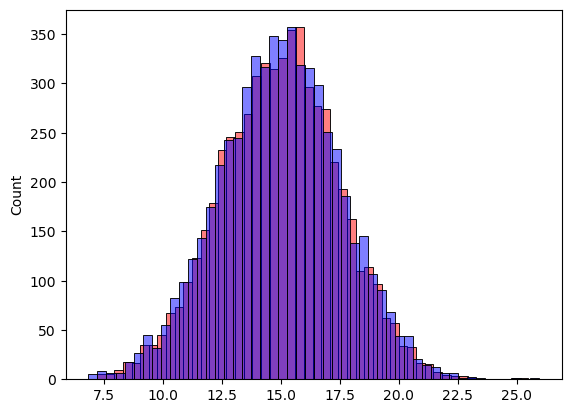

In [26]:
sns.histplot(y_pred_1, color='red', alpha=0.5, bins=50)
sns.histplot(y_train, color='blue', alpha=0.5, bins=50)

In [27]:
round(rmse(y_train, y_pred_1),3)

0.52

## 2nd Model with fill with Mean

In [28]:
print("2nd Methode na sum befor = ",df_train2.horsepower.isna().sum())
df_train2.horsepower = df_train2.horsepower.fillna(df_train2.horsepower.mean())
print("2nd Methode na sum after = ",df_train2.horsepower.isna().sum())

2nd Methode na sum befor =  429
2nd Methode na sum after =  0


In [29]:
X_train2 = df_train2.fillna(df_train2.horsepower.mean()).values

w0_2, w_2 = train_linear_regression(X_train2, y_train)

y_pred_2 = w0_2 + X_train2.dot(w_2)

In [30]:
w0_2, y_pred_2

(28.92525995164767,
 array([17.25910991, 16.19011261, 17.6924588 , ..., 17.51666431,
        18.77812427, 17.84593445]))

<Axes: ylabel='Count'>

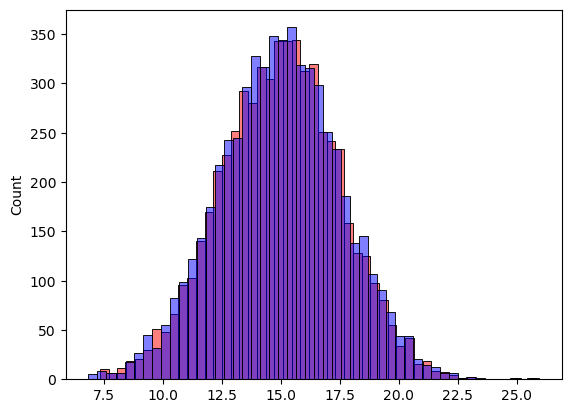

In [31]:
sns.histplot(y_pred_2, color='red', alpha=0.5, bins=50)
sns.histplot(y_train, color='blue', alpha=0.5, bins=50)

In [32]:
round(rmse(y_train, y_pred_2),2)

0.46

## Answer - With 0 - RMSE= 0.52

# Q4

# Regularization



In [33]:
df_train3.horsepower = df_train3.horsepower.fillna(0)
df_train3.isna().sum()

engine_displacement    0
horsepower             0
vehicle_weight         0
model_year             0
dtype: int64

In [34]:
def train_linear_regression_reg(X, y, r=0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])

    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

### Case r= 0

In [35]:
X_train3 = prepare_X(df_train3)
# 0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10
#  r= 0
w0_3, w_3 = train_linear_regression_reg(X_train3, y_train, r=0)

X_val_3 = prepare_X(df_val)
y_pred_3 = w0_3 + X_val_3.dot(w_3)
round(rmse(y_val, y_pred_3),2)

0.52

### Case r= 0.01

In [36]:
X_train3 = prepare_X(df_train3)
# 0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10
#  r= 0.01
w0_3, w_3 = train_linear_regression_reg(X_train3, y_train, r=0.01)

X_val_3 = prepare_X(df_val)
y_pred_3 = w0_3 + X_val_3.dot(w_3)
round(rmse(y_val, y_pred_3),2)

0.52

### Case r= 0.1

In [37]:
X_train3 = prepare_X(df_train3)
# 0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10
#  r= 0.1
w0_3, w_3 = train_linear_regression_reg(X_train3, y_train, r=0.1)

X_val_3 = prepare_X(df_val)
y_pred_3 = w0_3 + X_val_3.dot(w_3)
round(rmse(y_val, y_pred_3),2)

0.52

### Case r=  1

In [38]:
X_train3 = prepare_X(df_train3)
# 0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10
#  r= 1
w0_3, w_3 = train_linear_regression_reg(X_train3, y_train, r=1)

X_val_3 = prepare_X(df_val)
y_pred_3 = w0_3 + X_val_3.dot(w_3)
round(rmse(y_val, y_pred_3),2)

0.52

### Case r= 5

In [39]:
X_train3 = prepare_X(df_train3)
# 0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10
#  r= 5
w0_3, w_3 = train_linear_regression_reg(X_train3, y_train, r=5)

X_val_3 = prepare_X(df_val)
y_pred_3 = w0_3 + X_val_3.dot(w_3)
round(rmse(y_val, y_pred_3),2)

0.52

### Case r= 10

In [40]:
X_train3 = prepare_X(df_train3)

# 0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10
#  r= 10
w0_3, w_3 = train_linear_regression_reg(X_train3, y_train, r=10)

X_val_3 = prepare_X(df_val)
y_pred_3 = w0_3 + X_val_3.dot(w_3)
round(rmse(y_val, y_pred_3),2)

0.52

### Case r= 100

In [41]:
X_train3 = prepare_X(df_train3)

# 0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10
#  r= 100
w0_3, w_3 = train_linear_regression_reg(X_train3, y_train, r=100)

X_val_3 = prepare_X(df_val)
y_pred_3 = w0_3 + X_val_3.dot(w_3)
round(rmse(y_val, y_pred_3),2)

0.52

**OR** this methode

In [42]:
for r in [0, 0.01, 0.1, 1, 5, 10, 100]:
    X_train3 = prepare_X(df_train3)
    w0_3, w_3 = train_linear_regression_reg(X_train3, y_train, r=r)

    X_val_3 = prepare_X(df_val)
    y_pred_3 = w0_3 + X_val_3.dot(w_3)
    score = rmse(y_val, y_pred_3)
    
    print(r, w0_3, score)

0 28.82736547391715 0.5173782638835324
0.01 24.926838420052807 0.5171115525771272
0.1 11.239661084654571 0.5187525130701794
1 1.7315979411908333 0.5222348802092802
5 0.36380750205365636 0.5228916092823583
10 0.18306246622096356 0.5229812979636588
100 0.018418017307171547 0.523063623381993


 * the best r are : #  r= 1, #  r= 5, #  r= 10, # r= 100
 
 ## Answer - r= 1 with rmse = 0.52

# Q5

In [43]:
rmse_scores =[]

### Seed = 0

In [44]:
for s in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]:
    
    np.random.seed(s)
    np.random.shuffle(idx)
    df_train = df.iloc[idx[:n_train]]
    df_val = df.iloc[idx[n_train:n_train+n_val]]
    df_test = df.iloc[idx[n_train+n_val:]]
    
    df_train = df_train.reset_index(drop=True)
    df_val = df_val.reset_index(drop=True)
    df_test = df_test.reset_index(drop=True)

    y_train = df_train.fuel_efficiency_mpg.values
    y_val = df_val.fuel_efficiency_mpg.values
    y_test = df_test.fuel_efficiency_mpg.values
    
    # fillna with 0
    #df_train = df_train.fillna(0).values
    #print(df_train.isna().sum())
    
    # train 
    X_train = prepare_X(df_train)
    w0, w = train_linear_regression(X_train, y_train)
    
    # validate
    X_val = prepare_X(df_val)
    y_pred = w0 + X_val.dot(w)
    
    
    # rmse
    #score = round(np.sqrt(mean_squared_error(y_val, y_pred)),2)
    score = round(rmse(y_val, y_pred),3)
    rmse_scores.append(score)
    
    print('Seed=  {} , Rmse score = {}'.format(s,score))
    
    

Seed=  0 , Rmse score = 0.516
Seed=  1 , Rmse score = 0.516
Seed=  2 , Rmse score = 0.513
Seed=  3 , Rmse score = 0.508
Seed=  4 , Rmse score = 0.509
Seed=  5 , Rmse score = 0.53
Seed=  6 , Rmse score = 0.514
Seed=  7 , Rmse score = 0.512
Seed=  8 , Rmse score = 0.508
Seed=  9 , Rmse score = 0.505


In [45]:
rmse_scores

[0.516, 0.516, 0.513, 0.508, 0.509, 0.53, 0.514, 0.512, 0.508, 0.505]

In [46]:
std = np.std(rmse_scores)
print(' STD of RMSE Scores = {}'.format(round(std,3)))

 STD of RMSE Scores = 0.007


## Answer - RMSE STD = 0.006

# Q6

In [47]:
np.random.seed(9)
np.random.shuffle(idx)
df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train+n_val]]
df_test = df.iloc[idx[n_train+n_val:]]
    
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = df_train.fuel_efficiency_mpg.values
y_val = df_val.fuel_efficiency_mpg.values
y_test = df_test.fuel_efficiency_mpg.values

In [48]:
df_full_train = pd.concat([df_train, df_val])
df_full_train = df_full_train.reset_index(drop=True)
X_full_train = prepare_X(df_full_train)

y_full_train = np.concatenate([y_train, y_val])

In [49]:
w0, w = train_linear_regression_reg(X_full_train, y_full_train, r=0.001)


In [50]:
X_test = prepare_X(df_test)
y_pred = w0 + X_test.dot(w)
score = rmse(y_test, y_pred)
round(score,3)

0.518

## Answer - 0.515